In [25]:
import seaborn as sns
import pandas as pd 

In [26]:
iris_df = sns.load_dataset('iris')

In [27]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### I. Handling Missing Data
Problem: Incomplete observations skew results.

Solutions:

* Deletion: Remove rows/columns with missing values.
* Use when: Missing data is random and <5% of dataset.
* Imputation: Fill missing values.
* Numerical: Mean/median
* Categorical: Mode (most frequent value)

In [30]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [31]:
iris_df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

on this case we don't have any missing value so there is no need for missing data handling

### II. Categorical Data Encoding
Problem: ML algorithms require numerical input.

Solutions:

* Label Encoding: Assign integers to categories.

    * Example: "Red"→0, "Blue"→1

Use for: Ordinal data (e.g., "Low" < "Medium" < "High").

* One-Hot Encoding:Create binary columns per category.

    * Example: "Color_Red"=[1,0], "Color_Blue"=[0,1]

Use for: Nominal data (no order).
         encoding features, not the target

on this case __species__ is a categorical so it needs to be encoded 

In [32]:
print (iris_df["species"].unique())
species_count=len(iris_df["species"].unique())
species_count

['setosa' 'versicolor' 'virginica']


3

form the above we can observe that __species__ have 3 categories so we encode using label encoding because it is more appropriate since we are encoding target not a feature 

In [33]:
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}  
iris_df['species'] = iris_df['species'].map(species_mapping)
iris_df.head(n=150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### III. Outlier Detection
Problem: Extreme values distort statistics. Solutions:

#### 1.IQR Method:

* Q1: 25th percentile → "Middle" of the first half.

* Q2: 50th percentile → Median of the full dataset.

* Q3: 75th percentile → "Middle" of the second half.

            IQR = Q3 - Q1
            Lower Bound = Q1 - 1.5 * IQR
            Upper Bound = Q3 + 1.5 * IQR 
IQR = Q3 - Q1: Used for outlier detection (e.g., in boxplots). image.png


#### 2.Z-score: 
* Flag values where 
    * z= x−μ / σ
    * Then, flag outliers where |z| > 3 


for this case IQR will be used since it is Simple and effective for small, structured datasets like Iris

In [ ]:
to_be_scaled = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
outliers=[]


for feature in to_be_scaled:
    Q1 = iris_df[feature].quantile(0.25)
    Q3 = iris_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    feature_outliers = iris_df[
        (iris_df[feature] < Q1 - 1.5 * IQR) | 
        (iris_df[feature] > Q3 + 1.5 * IQR)
    ]
    
    print(f"\nFeature: {feature}")
    print("Q1:", Q1)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print("Number of outliers:", len(outliers))
    display(outliers)
    outliers.append(feature_outliers)
display(outliers)



Feature: sepal_length
Q1: 5.1
Q3: 6.4
IQR: 1.3000000000000007
Number of outliers: 0


[]


Feature: sepal_width
Q1: 2.8
Q3: 3.3
IQR: 0.5
Number of outliers: 1


[Empty DataFrame
 Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
 Index: []]


Feature: petal_length
Q1: 1.6
Q3: 5.1
IQR: 3.4999999999999996
Number of outliers: 2


[Empty DataFrame
 Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
 Index: [],
     sepal_length  sepal_width  petal_length  petal_width  species
 15           5.7          4.4           1.5          0.4        0
 32           5.2          4.1           1.5          0.1        0
 33           5.5          4.2           1.4          0.2        0
 60           5.0          2.0           3.5          1.0        1]


Feature: petal_width
Q1: 0.3
Q3: 1.8
IQR: 1.5
Number of outliers: 3


[Empty DataFrame
 Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
 Index: [],
     sepal_length  sepal_width  petal_length  petal_width  species
 15           5.7          4.4           1.5          0.4        0
 32           5.2          4.1           1.5          0.1        0
 33           5.5          4.2           1.4          0.2        0
 60           5.0          2.0           3.5          1.0        1,
 Empty DataFrame
 Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
 Index: []]

[Empty DataFrame
 Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
 Index: [],
     sepal_length  sepal_width  petal_length  petal_width  species
 15           5.7          4.4           1.5          0.4        0
 32           5.2          4.1           1.5          0.1        0
 33           5.5          4.2           1.4          0.2        0
 60           5.0          2.0           3.5          1.0        1,
 Empty DataFrame
 Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
 Index: [],
 Empty DataFrame
 Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
 Index: []]

#### outlier detection with  outlier removal

In [35]:
def remove_outliers_iqr(df, features):
    outlier_indices = set()
    outlier_summary = {}

    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        feature_outliers = df[
            (df[feature] < Q1 - 1.5 * IQR) | 
            (df[feature] > Q3 + 1.5 * IQR)
        ]

        outlier_indices.update(feature_outliers.index)
        outlier_summary[feature] = len(feature_outliers)

        print(f"\nFeature: {feature}")
        print("Q1:", Q1)
        print("Q3:", Q3)
        print("IQR:", IQR)
        print("Outliers in this feature:", len(feature_outliers))
        display(feature_outliers)


    cleaned_df = df.drop(index=outlier_indices)

    print(f"\nTotal unique outliers removed: {len(outlier_indices)}")
    print(f"Original dataset shape: {df.shape}")
    print(f"Cleaned dataset shape: {cleaned_df.shape}")

    return cleaned_df, outlier_summary


In [36]:
# to_be_scaled = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
# cleaned_iris_df, summary = remove_outliers_iqr(iris_df, to_be_scaled)


**Iv. Feature Scaling**

**Problem:**

Features on different scales bias models (e.g., age vs. salary).

**Solutions:**

Min-Max Scaling: Rescale to [0, 1].

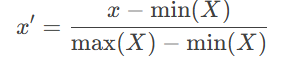



Standardization (Z-score): Center around mean (μ=0, σ=1).


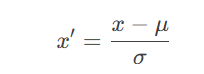

